In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from collections import Counter

In [3]:
%matplotlib inline

In [4]:
ment5 = pd.read_csv('Shodhganga_mentorship.csv', sep = ",")
ment5['advisor_inst_dept']=ment5['advisor_name']+"@"+ment5['instituteId']+"@"+ment5['DepartmentId']
ment5['res_inst_dept']=ment5['researcher_name']+"@"+ment5['instituteId']+"@"+ment5['DepartmentId']
index1=pd.unique(ment5[['advisor_inst_dept', 'res_inst_dept']].values.ravel('K'))
name_index=pd.DataFrame({'names_inst_dept':index1})
name_index['rid']=name_index.index
ment5["advisorId"]=ment5['advisor_inst_dept'].map(name_index.set_index('names_inst_dept')['rid'])
ment5["researcherId"]=ment5['res_inst_dept'].map(name_index.set_index('names_inst_dept')['rid'])

In [5]:
ment5.drop(columns=['advId_1','studId_1'], inplace=True)

In [8]:
#ment5.to_csv("Sodhganga_ment_dept_inst.csv",index=False)

In [50]:
#mod_ment2.drop_duplicates(subset=['advisorId', 'researcherId'], keep='first', inplace=True)

In [7]:
ment5.columns

Index(['advisorId', 'researcherId', 'advisor_name', 'researcher_name',
       'dc.date.submitted[]', 'dc.language.iso[]', 'dc.publisher.department[]',
       'DepartmentId', 'dc.publisher.institution[]', 'instituteId',
       'dc.title[]', 'thesisId', 'dc.type.degree', 'dc.date.awarded',
       'dc.subject.ddc', 'dc.source.uri', 'dc.description.abstract',
       'dc.title.alternative', 'advisor_inst_dept', 'res_inst_dept'],
      dtype='object')

In [6]:
graph1 = nx.convert_matrix.from_pandas_edgelist(ment5, 'advisorId','researcherId', create_using=nx.DiGraph())

In [ ]:
#len(graph.nodes())

In [ ]:
#graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment1, 'advId_1','studId_1','publisher_institution', create_using=nx.DiGraph())

In [7]:
len(graph1.nodes())

283983

In [ ]:
components = list(nx.weakly_connected_components(graph))

In [8]:
components1 = list(nx.weakly_connected_components(graph1))

In [ ]:
components.sort(key=len, reverse=True)

In [9]:
components1.sort(key=len, reverse=True)

In [ ]:
len(components)

In [ ]:
#len(components[0])

In [10]:
len(components1)

82680

In [11]:
len(components1[0])

698

In [12]:
comp_len=[len(c) for c in components1]

In [13]:
comp_size_dist=Counter(comp_len)

In [14]:
comp_size_dist

Counter({698: 1,
         443: 1,
         377: 1,
         344: 1,
         316: 1,
         302: 1,
         253: 1,
         239: 1,
         236: 1,
         228: 1,
         206: 1,
         194: 1,
         188: 1,
         172: 1,
         171: 1,
         163: 1,
         161: 1,
         150: 1,
         149: 1,
         145: 1,
         141: 1,
         138: 1,
         134: 1,
         133: 1,
         132: 1,
         130: 1,
         129: 1,
         125: 1,
         122: 1,
         121: 1,
         116: 1,
         115: 1,
         114: 1,
         111: 2,
         110: 1,
         109: 1,
         108: 1,
         106: 1,
         103: 1,
         102: 1,
         101: 1,
         100: 1,
         98: 1,
         96: 1,
         95: 1,
         93: 3,
         92: 1,
         91: 1,
         88: 3,
         87: 2,
         85: 1,
         83: 1,
         81: 2,
         80: 4,
         79: 2,
         77: 1,
         76: 1,
         74: 6,
         73: 1,
         72: 3

In [15]:
in_dgr = graph1.in_degree()

In [16]:
in_dgr = dict(in_dgr)

In [17]:
sorted_in_dgr = dict(sorted(in_dgr.items(), key=lambda item: item[1],reverse=True))

In [18]:
sorted_in_dgr

{186795: 7,
 98768: 6,
 98770: 5,
 184950: 5,
 186156: 5,
 186728: 5,
 47976: 5,
 186986: 5,
 187010: 5,
 191635: 5,
 76205: 5,
 260367: 5,
 98694: 4,
 98844: 4,
 99508: 4,
 106305: 4,
 111310: 4,
 111530: 4,
 118533: 4,
 121867: 4,
 127407: 4,
 140963: 4,
 24626: 4,
 151395: 4,
 155385: 4,
 171604: 4,
 172041: 4,
 177939: 4,
 184933: 4,
 185309: 4,
 185719: 4,
 186037: 4,
 186051: 4,
 186052: 4,
 186202: 4,
 186760: 4,
 186858: 4,
 186862: 4,
 186873: 4,
 186946: 4,
 186991: 4,
 187047: 4,
 189861: 4,
 190834: 4,
 191507: 4,
 191605: 4,
 191927: 4,
 207079: 4,
 215005: 4,
 215010: 4,
 224660: 4,
 70600: 4,
 235662: 4,
 244419: 4,
 252384: 4,
 252393: 4,
 252405: 4,
 262986: 4,
 279806: 4,
 96048: 3,
 97987: 3,
 98522: 3,
 98524: 3,
 98528: 3,
 98677: 3,
 98690: 3,
 98705: 3,
 98715: 3,
 98718: 3,
 98723: 3,
 98726: 3,
 98731: 3,
 98769: 3,
 98774: 3,
 98775: 3,
 98777: 3,
 98778: 3,
 98779: 3,
 98789: 3,
 98826: 3,
 98847: 3,
 98909: 3,
 98913: 3,
 99036: 3,
 99505: 3,
 99516: 3,
 995

In [19]:
in_dgr_val = in_dgr.values()

In [20]:
in_dgr_dist = Counter(in_dgr_val)

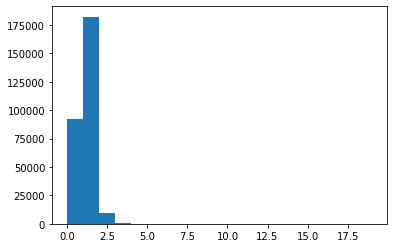

In [21]:
plt.hist(in_dgr_val, bins=np.arange(0,20,1))
plt.show()

In [22]:
in_dgr_dist #indgree, no.nodes

Counter({0: 91854, 1: 182211, 2: 9482, 3: 377, 4: 47, 6: 1, 5: 10, 7: 1})

In [23]:
#list(sorted_fecundity.keys())[-5:]

In [24]:
#ment[ment['advId_1']==75844]

In [25]:
out_dgr = graph1.out_degree()

In [26]:
out_dgr = dict(out_dgr)

In [27]:
sorted_out_dgr = dict(sorted(out_dgr.items(), key=lambda item: item[1],reverse=True))

In [28]:
sorted_out_dgr

{50529: 125,
 24090: 60,
 89241: 60,
 1775: 58,
 28006: 53,
 79021: 49,
 8085: 46,
 82700: 46,
 63121: 44,
 83345: 44,
 90457: 44,
 1382: 43,
 18925: 43,
 55622: 43,
 65617: 43,
 50356: 42,
 81305: 41,
 4050: 40,
 50147: 40,
 60608: 39,
 81317: 39,
 65089: 38,
 70784: 38,
 79022: 38,
 42250: 37,
 63092: 36,
 70777: 36,
 27824: 35,
 50731: 35,
 61973: 35,
 9268: 34,
 18947: 34,
 42251: 34,
 48347: 34,
 66380: 34,
 43136: 33,
 43143: 33,
 55619: 33,
 66385: 33,
 75428: 33,
 717: 32,
 18801: 32,
 19777: 32,
 42098: 32,
 57790: 32,
 81309: 32,
 391: 31,
 8090: 31,
 15271: 31,
 21537: 31,
 33450: 31,
 62987: 31,
 78978: 31,
 79031: 31,
 12241: 30,
 16920: 30,
 16945: 30,
 19755: 30,
 21558: 30,
 41259: 30,
 42241: 30,
 47750: 30,
 51352: 30,
 74820: 30,
 85545: 30,
 7723: 29,
 13672: 29,
 15916: 29,
 15924: 29,
 31294: 29,
 53844: 29,
 63051: 29,
 65119: 29,
 71852: 29,
 72139: 29,
 79667: 29,
 81320: 29,
 83151: 29,
 94693: 29,
 24775: 28,
 27531: 28,
 27979: 28,
 33758: 28,
 33871: 28,
 4

In [42]:
out_dgr_val = out_dgr.values()

In [43]:
out_dgr_dist = Counter(out_dgr_val)

In [44]:
deg, cnt = zip(*out_dgr_dist.items())

In [45]:
out_dgr_dist #out Degree, Number of node

Counter({1: 60989,
         0: 188621,
         4: 3826,
         2: 14834,
         5: 2336,
         3: 6808,
         7: 1102,
         8: 870,
         9: 574,
         6: 1662,
         24: 22,
         12: 290,
         31: 8,
         10: 454,
         11: 364,
         16: 145,
         32: 6,
         14: 187,
         17: 86,
         43: 4,
         18: 64,
         25: 28,
         22: 43,
         13: 222,
         58: 1,
         15: 152,
         26: 21,
         23: 27,
         21: 34,
         40: 2,
         20: 53,
         29: 14,
         19: 63,
         46: 2,
         27: 11,
         34: 5,
         30: 11,
         60: 2,
         28: 16,
         35: 3,
         53: 1,
         37: 1,
         33: 5,
         42: 1,
         125: 1,
         39: 2,
         36: 2,
         44: 3,
         38: 3,
         49: 1,
         41: 1})

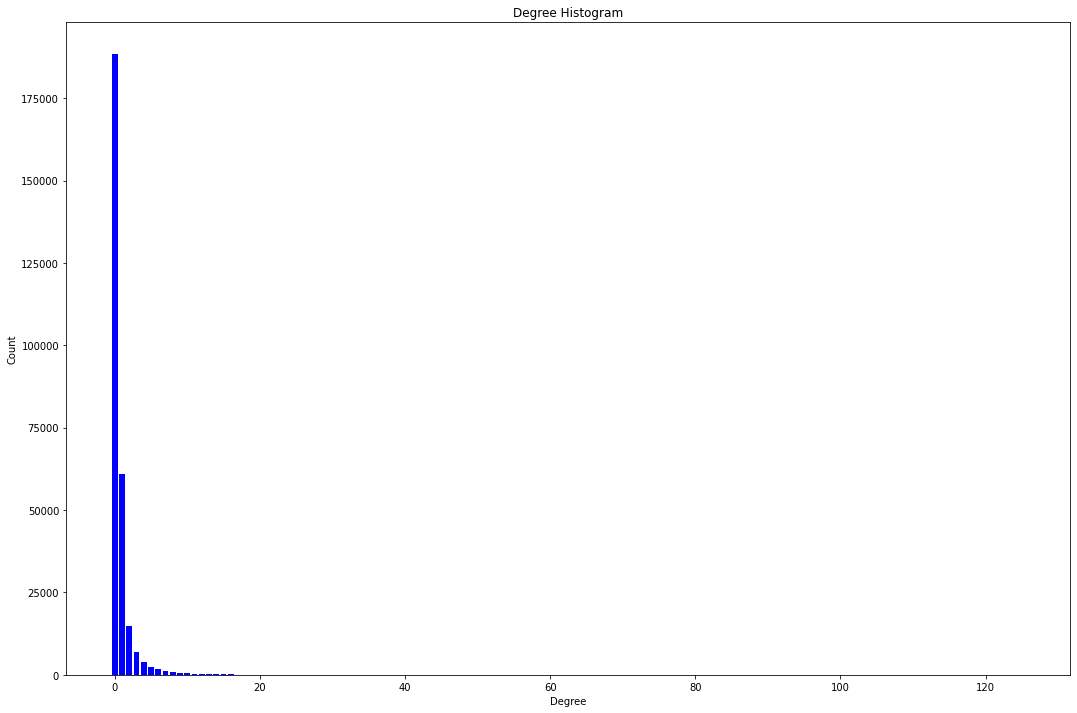

In [54]:
fig, ax = plt.subplots(figsize=(18,12))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
#ax.set_xticks([d for d in deg])
#ax.set_xticklabels(deg)
plt.show()

<h2>ANCESTORS, DESCENDANTS</h2>

In [41]:
len(nx.descendants(graph1,83151.0))

31

In [40]:
len(nx.ancestors(graph1,83151.0))

0

In [31]:
ment5.columns 

Index(['advisorId', 'researcherId', 'advId_1', 'studId_1', 'advisor_name',
       'researcher_name', 'dc.date.submitted[]', 'dc.language.iso[]',
       'dc.publisher.department[]', 'DepartmentId',
       'dc.publisher.institution[]', 'instituteId', 'dc.title[]', 'thesisId',
       'dc.type.degree', 'dc.date.awarded', 'dc.subject.ddc', 'dc.source.uri',
       'dc.description.abstract', 'dc.title.alternative', 'advisor_inst_dept',
       'res_inst_dept'],
      dtype='object')

In [53]:
ment5[(ment5["advisorId"]==81317.0)]['dc.publisher.department[]'].value_counts()

department of hindi    39
Name: dc.publisher.department[], dtype: int64

In [50]:
ment5['dc.subject.ddc']

0         500::Natural sciences & mathematics|580::Plant...
1                                      300::Social sciences
2                                      300::Social sciences
3                                      300::Social sciences
4                                      300::Social sciences
                                ...                        
205230          300::Social sciences|320::Political science
205231          300::Social sciences|320::Political science
205232          300::Social sciences|320::Political science
205233          300::Social sciences|320::Political science
205234          300::Social sciences|320::Political science
Name: dc.subject.ddc, Length: 205235, dtype: object

In [57]:
ment5[ment5["researcherId"]==186795]['dc.title[]'].value_counts()

Bhartiye kavyashastra Aur Kabir ka sahitya                                    1
Lokgeet parampara Aur prayog                                                  1
Tritya saptak mein samajik evam rashtriye chetna                              1
Vyangyakaar Harishankar Parsai Aur unka rachna karm                           1
Jain dharm evam baudh dharm mein samaj darshan ka ek samikshatmak adhyayan    1
Tritiya saptak mein samajik evam rashtriya chetna                             1
Dr Rangey Raghav Ke upanyason Aur yugchetna                                   1
Nagarjuna ke katha sahitya mein janwadi chetna                                1
Name: dc.title[], dtype: int64